In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/imdb-top-250-movies-dataset/IMDB Top 250 Movies.csv


In [2]:
data=pd.read_csv('/kaggle/input/imdb-top-250-movies-dataset/IMDB Top 250 Movies.csv')

In [3]:
#display the first 10 rows of the dataset
data.head(10)

,rank,name,year,rating,genre,certificate,run_time,tagline,budget,box_office,casts,directors,writers
0,1,The Shawshank Redemption,1994,9.3,Drama,R,2h 22m,Fear can hold you prisoner. Hope can set you f...,25000000,28884504,"Tim Robbins,Morgan Freeman,Bob Gunton,William ...",Frank Darabont,"Stephen King,Frank Darabont"
1,2,The Godfather,1972,9.2,"Crime,Drama",R,2h 55m,An offer you can't refuse.,6000000,250341816,"Marlon Brando,Al Pacino,James Caan,Diane Keato...",Francis Ford Coppola,"Mario Puzo,Francis Ford Coppola"
2,3,The Dark Knight,2008,9.0,"Action,Crime,Drama",PG-13,2h 32m,Why So Serious?,185000000,1006234167,"Christian Bale,Heath Ledger,Aaron Eckhart,Mich...",Christopher Nolan,"Jonathan Nolan,Christopher Nolan,David S. Goyer"
3,4,The Godfather Part II,1974,9.0,"Crime,Drama",R,3h 22m,All the power on earth can't change destiny.,13000000,47961919,"Al Pacino,Robert De Niro,Robert Duvall,Diane K...",Francis Ford Coppola,"Francis Ford Coppola,Mario Puzo"
4,5,12 Angry Men,1957,9.0,"Crime,Drama",Approved,1h 36m,Life Is In Their Hands -- Death Is On Their Mi...,350000,955,"Henry Fonda,Lee J. Cobb,Martin Balsam,John Fie...",Sidney Lumet,Reginald Rose
5,6,Schindler's List,1993,9.0,"Biography,Drama,History",R,3h 15m,"Whoever saves one life, saves the world entire.",22000000,322161245,"Liam Neeson,Ralph Fiennes,Ben Kingsley,Carolin...",Steven Spielberg,"Thomas Keneally,Steven Zaillian"
6,7,The Lord of the Rings: The Return of the King,2003,9.0,"Action,Adventure,Drama",PG-13,3h 21m,The eye of the enemy is moving.,94000000,1146457748,"Elijah Wood,Viggo Mortensen,Ian McKellen,Orlan...",Peter Jackson,"J.R.R. Tolkien,Fran Walsh,Philippa Boyens"
7,8,Pulp Fiction,1994,8.9,"Crime,Drama",R,2h 34m,Girls like me don't make invitations like this...,8000000,213928762,"John Travolta,Uma Thurman,Samuel L. Jackson,Br...",Quentin Tarantino,"Quentin Tarantino,Roger Avary"
8,9,The Lord of the Rings: The Fellowship of the Ring,2001,8.8,"Action,Adventure,Drama",PG-13,2h 58m,The Legend Comes to Life,93000000,898204420,"Elijah Wood,Ian McKellen,Orlando Bloom,Sean Be...",Peter Jackson,"J.R.R. Tolkien,Fran Walsh,Philippa Boyens"
9,10,"The Good, the Bad and the Ugly",1966,8.8,"Adventure,Western",Approved,2h 58m,They formed an alliance of hate to steal a for...,1200000,25253887,"Clint Eastwood,Eli Wallach,Lee Van Cleef,Aldo ...",Sergio Leone,"Luciano Vincenzoni,Sergio Leone,Agenore Incrocci"


In [4]:
#display last 10 rows of the dataset 
data.tail(10)

,rank,name,year,rating,genre,certificate,run_time,tagline,budget,box_office,casts,directors,writers
240,241,The Sound of Music,1965,8.1,"Biography,Drama,Family",G,2h 52m,RADIANCE THAT FLOODS THE SCREEN...AND WARMS TH...,8200000,159428329,"Julie Andrews,Christopher Plummer,Eleanor Park...",Robert Wise,"Georg Hurdalek,Howard Lindsay,Russel Crouse"
241,242,It Happened One Night,1934,8.1,"Comedy,Romance",Passed,1h 45m,Two great lovers of the screen in the grandest...,325000,11477,"Clark Gable,Claudette Colbert,Walter Connolly,...",Frank Capra,"Robert Riskin,Samuel Hopkins Adams"
242,243,Persona,1966,8.1,"Drama,Thriller",Not Rated,1h 23m,A new film by Ingmar Bergman,Not Available,Not Available,"Bibi Andersson,Liv Ullmann,Margaretha Krook,Gu...",Ingmar Bergman,Ingmar Bergman
243,244,Life of Brian,1979,8.0,Comedy,R,1h 34m,A motion picture destined to offend nearly two...,4000000,20745728,"Graham Chapman,John Cleese,Michael Palin,Terry...",Terry Jones,"Graham Chapman,John Cleese,Terry Gilliam"
244,245,The Iron Giant,1999,8.1,"Animation,Action,Adventure",PG,1h 26m,Some secrets are too huge to hide,70000000,23335817,"Eli Marienthal,Harry Connick Jr.,Jennifer Anis...",Brad Bird,"Tim McCanlies,Brad Bird,Ted Hughes"
245,246,The Help,2011,8.1,Drama,PG-13,2h 26m,Change begins with a whisper.,25000000,216639112,"Viola Davis,Emma Stone,Octavia Spencer,Bryce D...",Tate Taylor,"Tate Taylor,Kathryn Stockett"
246,247,Dersu Uzala,1975,8.2,"Adventure,Biography,Drama",G,2h 22m,There is man and beast at nature's mercy. Ther...,4000000,14480,"Maksim Munzuk,Yuriy Solomin,Mikhail Bychkov,Vl...",Akira Kurosawa,"Akira Kurosawa,Yuriy Nagibin,Vladimir Arsenev"
247,248,Aladdin,1992,8.0,"Animation,Adventure,Comedy",G,1h 30m,Wish granted! (DVD re-release),Not Available,Not Available,"Scott Weinger,Robin Williams,Linda Larkin,Jona...","Ron Clements,John Musker","Ron Clements,John Musker,Ted Elliott"
248,249,Gandhi,1982,8.0,"Biography,Drama,History",PG,3h 11m,His Triumph Changed The World Forever.,22000000,52767889,"Ben Kingsley,John Gielgud,Rohini Hattangadi,Ro...",Richard Attenborough,John Briley
249,250,Dances with Wolves,1990,8.0,"Adventure,Drama,Western",PG-13,3h 1m,Inside everyone is a frontier waiting to be di...,22000000,424208848,"Kevin Costner,Mary McDonnell,Graham Greene,Rod...",Kevin Costner,Michael Blake


In [5]:
#shape of the dataset
data.shape
print("Number of movies:",data.shape[0])
print("Number of variables:",data.shape[1])

Number of movies: 250
Number of variables: 13


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   rank         250 non-null    int64  
 1   name         250 non-null    object 
 2   year         250 non-null    int64  
 3   rating       250 non-null    float64
 4   genre        250 non-null    object 
 5   certificate  250 non-null    object 
 6   run_time     250 non-null    object 
 7   tagline      250 non-null    object 
 8   budget       250 non-null    object 
 9   box_office   250 non-null    object 
 10  casts        250 non-null    object 
 11  directors    250 non-null    object 
 12  writers      250 non-null    object 
dtypes: float64(1), int64(2), object(10)
memory usage: 25.5+ KB


Rows: 250 movies
Columns: 1 float,2 integers and 10 objects


In [7]:
#check missing values
data.isnull().values.any()

False

In [8]:
#check duplicate values 
data.duplicated().any()

False

In [9]:
#stats about rank,year and ratings variables
data.describe()

,rank,year,rating
count,250.000000,250.000000,250.000000
mean,125.500000,1986.360000,8.307200
std,72.312977,25.125356,0.229081
min,1.000000,1921.000000,8.000000
25%,63.250000,1966.250000,8.100000
50%,125.500000,1994.000000,8.200000
75%,187.750000,2006.000000,8.400000
max,250.000000,2022.000000,9.300000


**Rating:**
-the average rating for top 250 movies is 8.3072
-the max rating is 9.3 
-the min rating is 8.0
**Year**
-the newest movie was in 2022
-the oldest movie was in 1921

In [10]:
data.columns

Index(['rank', 'name', 'year', 'rating', 'genre', 'certificate', 'run_time',
       'tagline', 'budget', 'box_office', 'casts', 'directors', 'writers'],
      dtype='object')

In [11]:
#the average rating per year
avg_rate=data.groupby('year')['rating'].mean()

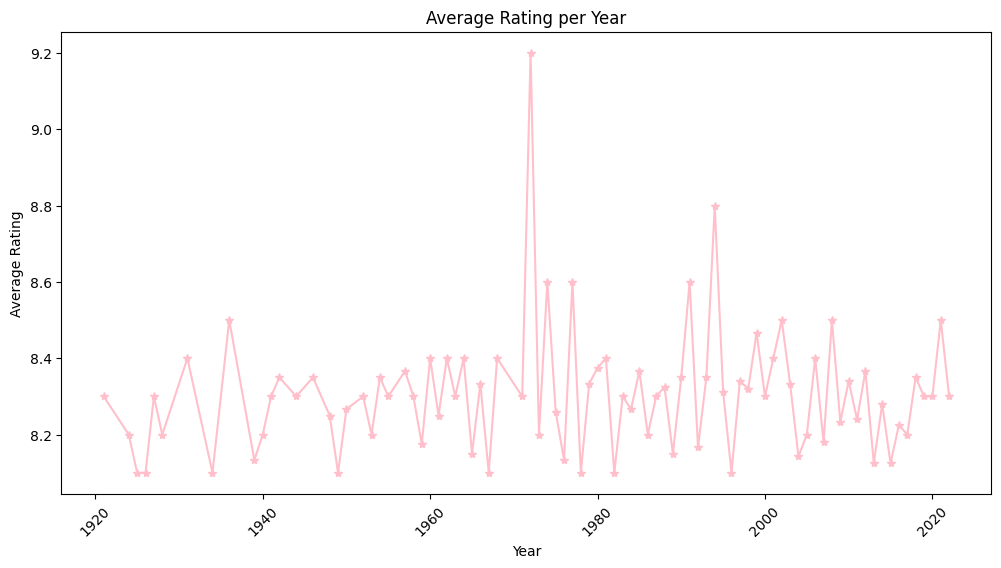

In [12]:
plt.figure(figsize=(12, 6))
avg_rate.plot(marker='*', color='pink', linestyle='-')
plt.title('Average Rating per Year')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()

In [13]:
#the average rating for each director 
data.groupby('directors')['rating'].mean().sort_values(ascending=False)

directors
Frank Darabont              8.950000
Francis Ford Coppola        8.900000
Peter Jackson               8.866667
T.J. Gnanavel               8.800000
Irvin Kershner              8.700000
                              ...   
Brad Bird                   8.050000
Terry Jones                 8.000000
Richard Attenborough        8.000000
Ron Clements,John Musker    8.000000
Kevin Costner               8.000000
Name: rating, Length: 160, dtype: float64

In [14]:
#display top 10 highest rated movies 
top10=data.nlargest(10,'rating')[['name','rating','directors']].set_index('name')
top10

,rating,directors
name,,
The Shawshank Redemption,9.3,Frank Darabont
The Godfather,9.2,Francis Ford Coppola
The Dark Knight,9.0,Christopher Nolan
The Godfather Part II,9.0,Francis Ford Coppola
12 Angry Men,9.0,Sidney Lumet
Schindler's List,9.0,Steven Spielberg
The Lord of the Rings: The Return of the King,9.0,Peter Jackson
Pulp Fiction,8.9,Quentin Tarantino
The Lord of the Rings: The Fellowship of the Ring,8.8,Peter Jackson


<Axes: xlabel='rating', ylabel='name'>

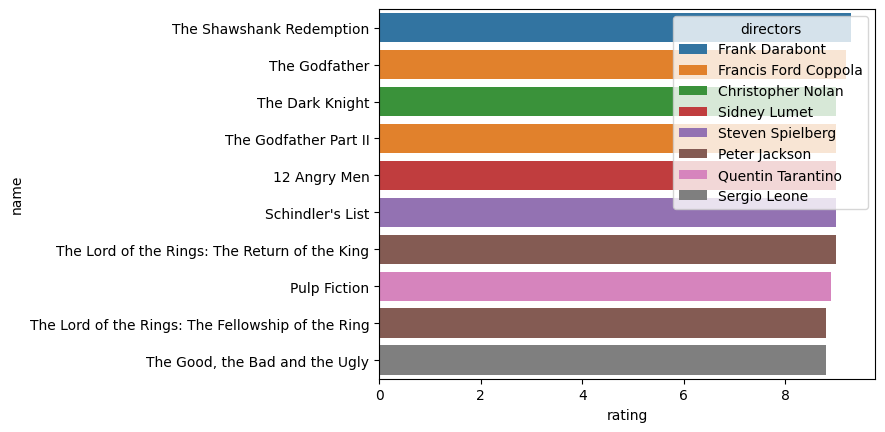

In [15]:
#barplot 
sns.barplot(x='rating',y=top10.index,data=top10,hue='directors',dodge=False)

In [16]:
#number of movies per Year 
data['year'].value_counts()

year
1995    8
2004    7
2009    6
1957    6
2003    6
       ..
1941    1
1958    1
2022    1
1987    1
1934    1
Name: count, Length: 86, dtype: int64

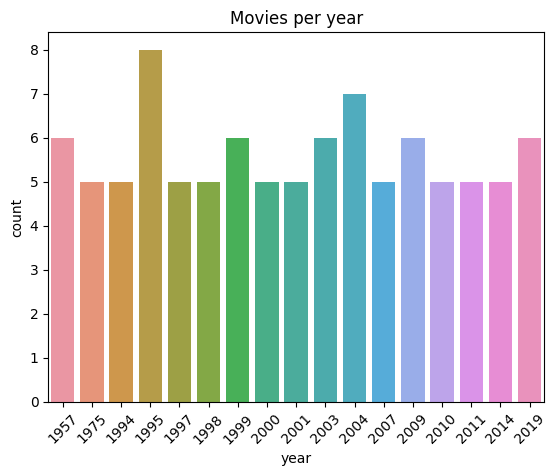

In [17]:
#showing the years with more than 4 movies released
sns.countplot(x='year',data=data[data['year'].map(data['year'].value_counts()) > 4])
plt.title('Movies per year')
plt.xticks(rotation=45)
plt.show()

In [18]:
len(data[data['genre'].str.contains('Drama',case=False)])
  

177

**177/250 top movies are drama**

In [19]:
#how many genres are in this dataset 
#creating list and split the genres
list=[]
for i in data ['genre']:
     list.append(i.split(','))
list2=[]
for i in list:
    for j in i:
        list2.append(j)
#find unique values 
uni_list=[]
for i in list2:
    if i not in uni_list:
        uni_list.append (i)
print(uni_list)
print("there are",len(uni_list),"genres")

['Drama', 'Crime', 'Action', 'Biography', 'History', 'Adventure', 'Western', 'Romance', 'Sci-Fi', 'Fantasy', 'Mystery', 'Family', 'Thriller', 'War', 'Comedy', 'Animation', 'Music', 'Horror', 'Film-Noir', 'Musical', 'Sport']
there are 21 genres


In [20]:
#how many movies were made for each genre?
from collections import Counter

In [21]:
genre_list=Counter(list2)
genre_list

Counter({'Drama': 177,
         'Adventure': 60,
         'Crime': 51,
         'Action': 50,
         'Comedy': 45,
         'Mystery': 31,
         'Thriller': 30,
         'Biography': 29,
         'Romance': 23,
         'War': 23,
         'Animation': 23,
         'Sci-Fi': 20,
         'Fantasy': 14,
         'Family': 13,
         'History': 10,
         'Western': 7,
         'Horror': 5,
         'Sport': 5,
         'Music': 4,
         'Film-Noir': 4,
         'Musical': 1})

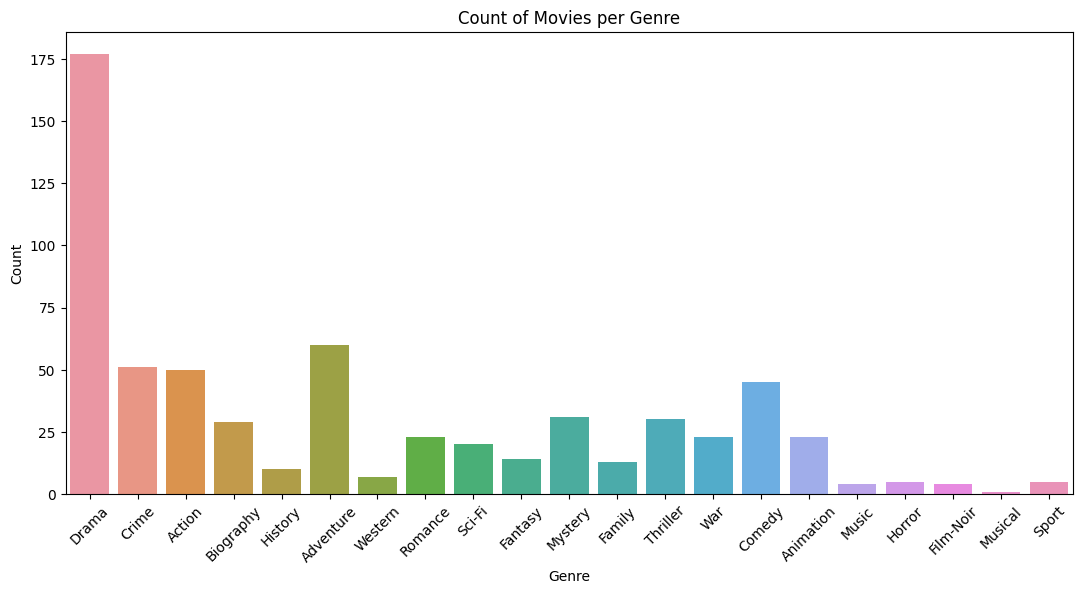

In [22]:
genre_df=pd.DataFrame.from_dict(genre_list, orient='index').reset_index()
genre_df.columns = ['Genre', 'Count']
plt.figure(figsize=(13, 6))
sns.barplot(x='Genre', y='Count', data=genre_df)
plt.title("Count of Movies per Genre")
plt.xticks(rotation=45)
plt.show()

In [23]:
director_counts = data['directors'].explode().value_counts()
director_counts

directors
Martin Scorsese       7
Christopher Nolan     7
Steven Spielberg      7
Stanley Kubrick       7
Akira Kurosawa        7
                     ..
Jean-Pierre Jeunet    1
Orson Welles          1
Thomas Vinterberg     1
Elem Klimov           1
Kevin Costner         1
Name: count, Length: 160, dtype: int64

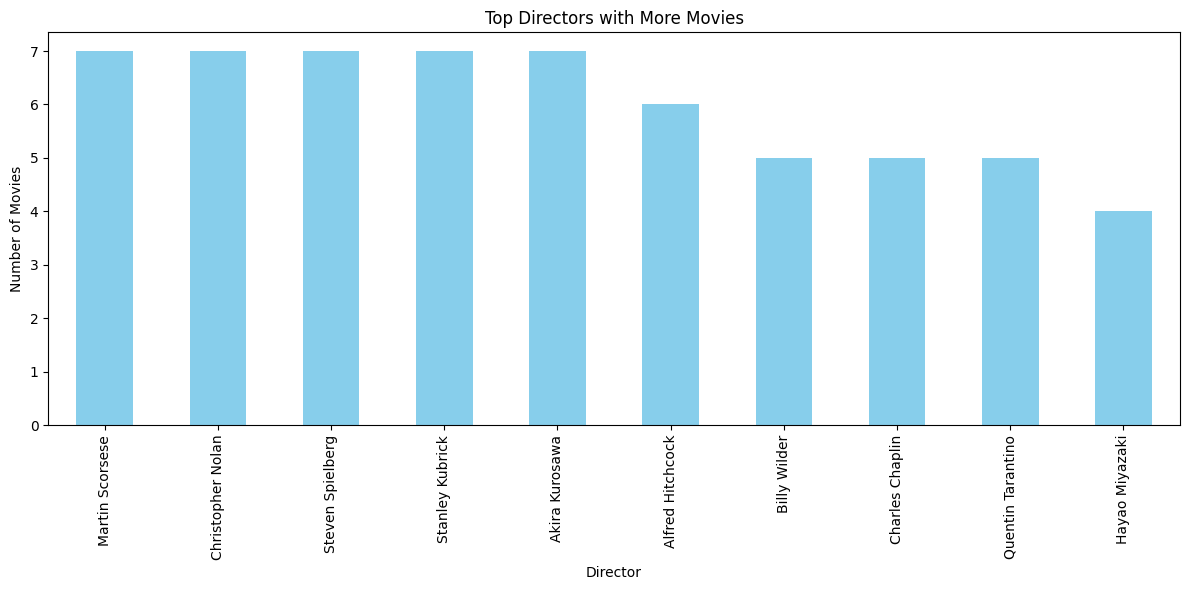

In [24]:
plt.figure(figsize=(12, 6))
director_counts.head(10).plot(kind='bar', color='skyblue')
plt.title('Top Directors with More Movies')
plt.xlabel('Director')
plt.ylabel('Number of Movies')
plt.tight_layout()
plt.show()